In [ ]:
pip install lazypredict

## Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
sample = pd.read_csv("/content/sample_submission.csv")
test["Transported"]=sample["Transported"]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


In [ ]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.nunique().sort_values()

CryoSleep          2
VIP                2
Transported        2
HomePlanet         3
Destination        3
Age               80
ShoppingMall    1115
RoomService     1273
VRDeck          1306
Spa             1327
FoodCourt       1507
Cabin           6560
Name            8473
PassengerId     8693
dtype: int64

## EDA

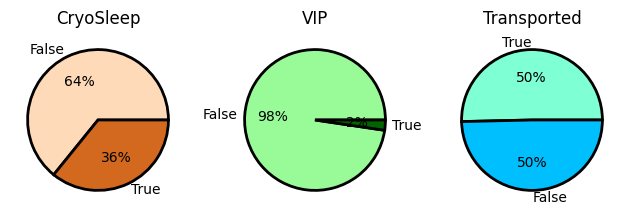

In [ ]:
plt.subplot(1,3,1)
mydata = train['CryoSleep'].value_counts()
mylabel = train['CryoSleep'].value_counts().index.to_list()
mycolors = ["peachpuff", "chocolate"]
plt.pie(mydata, labels = mylabel, colors = mycolors, autopct='%1.0f%%',
        wedgeprops = {"edgecolor" : "black", 'linewidth': 2, 'antialiased': True})
plt.title("CryoSleep")

plt.subplot(1,3,2)
mydata = train['VIP'].value_counts()
mylabel = train['VIP'].value_counts().index.to_list()
mycolors = ["palegreen", "darkgreen"]
plt.pie(mydata, labels = mylabel, colors = mycolors, autopct='%1.0f%%',
        wedgeprops = {"edgecolor" : "black", 'linewidth': 2, 'antialiased': True})
plt.title("VIP")

plt.subplot(1,3,3)
mydata = train['Transported'].value_counts()
mylabel = train['Transported'].value_counts().index.to_list()
mycolors = ["aquamarine", "deepskyblue"]
plt.pie(mydata, labels = mylabel, colors = mycolors, autopct='%1.0f%%',
        wedgeprops = {"edgecolor" : "black", 'linewidth': 2, 'antialiased': True})
plt.title("Transported")

plt.tight_layout()
plt.show()

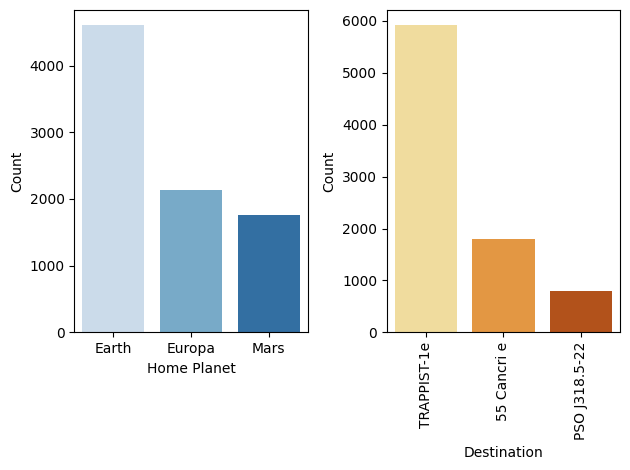

In [ ]:
plt.subplot(1,2,1)
homePlanetCount = train['HomePlanet'].value_counts()
sns.barplot(x=homePlanetCount.index ,y=homePlanetCount, palette="Blues")
plt.xlabel("Home Planet")
plt.ylabel("Count")

plt.subplot(1,2,2)
destinationCount = train['Destination'].value_counts()
sns.barplot(x=destinationCount.index ,y=destinationCount, palette="YlOrBr")
plt.xticks(rotation=90)
plt.xlabel("Destination")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

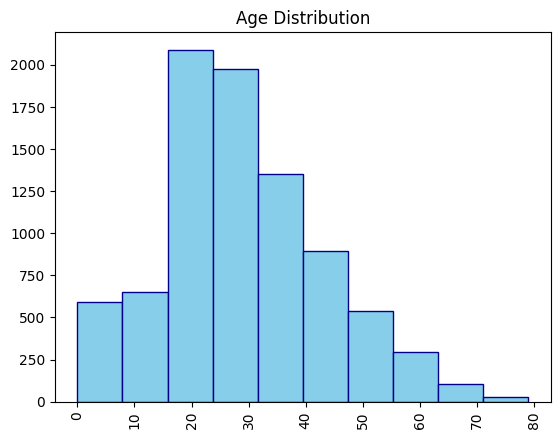

In [ ]:
plt.hist(x =train['Age'], bins=10, color = "skyblue", ec='darkblue')
plt.xticks(rotation=90)
plt.title("Age Distribution")
plt.show()

<Axes: title={'center': 'boxplot'}>

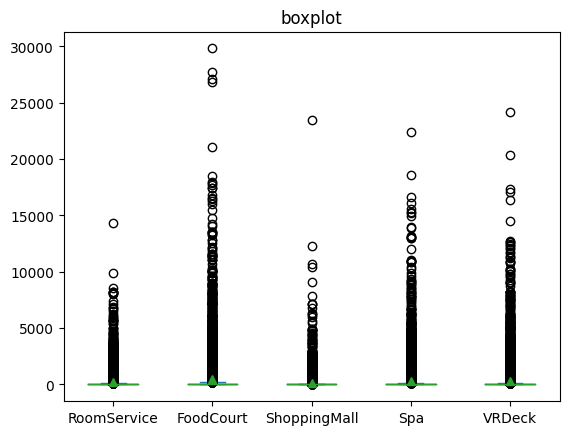

In [ ]:
train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].plot(kind='box', title='boxplot', showmeans=True)

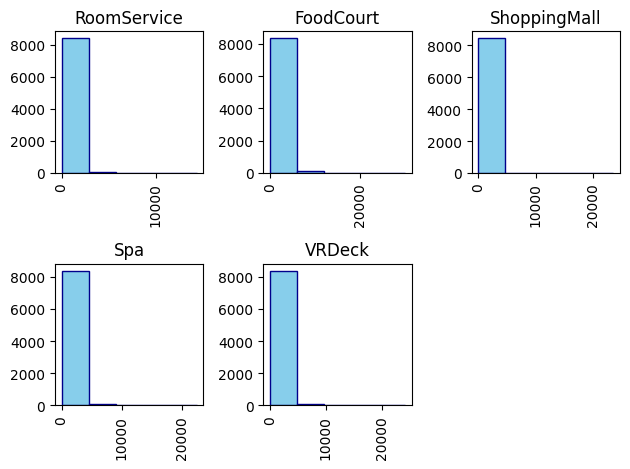

In [ ]:
plt.subplot(2,3,1)
plt.hist(x =train['RoomService'], bins=5, color = "skyblue", ec='darkblue')
plt.xticks(rotation=90)
plt.title("RoomService")

plt.subplot(2,3,2)
plt.hist(x =train['FoodCourt'], bins=5, color = "skyblue", ec='darkblue')
plt.xticks(rotation=90)
plt.title("FoodCourt")

plt.subplot(2,3,3)
plt.hist(x =train['ShoppingMall'], bins=5, color = "skyblue", ec='darkblue')
plt.xticks(rotation=90)
plt.title("ShoppingMall")

plt.subplot(2,3,4)
plt.hist(x =train['Spa'], bins=5, color = "skyblue", ec='darkblue')
plt.xticks(rotation=90)
plt.title("Spa")

plt.subplot(2,3,5)
plt.hist(x =train['VRDeck'], bins=5, color = "skyblue", ec='darkblue')
plt.xticks(rotation=90)
plt.title("VRDeck")

plt.tight_layout()
plt.show()

## Feature Engineering

In [ ]:
#Filling Null Values in Categorical Columns with constant

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
features = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Cabin']
train[features] = imputer.fit_transform(train[features])
test[features] = imputer.transform(test[features])

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train[features] = imputer.fit_transform(train[features])
test[features] = imputer.transform(test[features])

In [ ]:
# PassengerId takes the form gggg_pp where gggg indicates a group the passenger is travelling with
# and pp is their number within the group.

# Creating 2 different columns to store gggg(GroupNo) and pp(GroupSize)

train['GroupNo'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['GroupNo'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

train['GroupSize']=train['GroupNo'].map(lambda x: pd.concat([train['GroupNo'], test['GroupNo']]).value_counts()[x])
test['GroupSize']=test['GroupNo'].map(lambda x: pd.concat([train['GroupNo'], test['GroupNo']]).value_counts()[x])

In [ ]:
#Cabin
train[["CabinDeck", "CabinNum", "CabinSide"]] = train["Cabin"].str.split("/", expand=True)
test[["CabinDeck", "CabinNum", "CabinSide"]] = test["Cabin"].str.split("/", expand=True)

In [ ]:
#Categorincal data to numeric
features = ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']
train = pd.get_dummies(train, columns=features, dtype=int)
test = pd.get_dummies(test, columns=features, dtype=int)

In [ ]:
train = train.astype({"CryoSleep":'int', "Age":'int', "VIP":'int', "RoomService":'int', "FoodCourt":'int',
                      "ShoppingMall":'int', "Spa":'int', "VRDeck":'int', "Transported":'int'})

test = test.astype({"CryoSleep":'int', "Age":'int', "VIP":'int', "RoomService":'int', "FoodCourt":'int',
                      "ShoppingMall":'int', "Spa":'int', "VRDeck":'int', "Transported":'int'})

In [ ]:
train.drop(['PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)
test.drop(['PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)

In [ ]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train['Expenditure']=train[exp_feats].sum(axis=1)
test['Expenditure']=train[exp_feats].sum(axis=1)
train.drop(exp_feats, axis=1, inplace=True)
test.drop(exp_feats, axis=1, inplace=True)

In [ ]:
train.corr().sort_values(by='Transported')

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNo,...,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S,Expenditure
RoomService,-0.24,0.07,0.06,1.00,-0.02,0.05,0.01,-0.02,-0.24,0.00,...,-0.06,-0.02,0.16,0.04,0.09,-0.13,0.01,0.01,-0.01,0.23
Spa,-0.20,0.12,0.06,0.01,0.22,0.01,1.00,0.15,-0.22,-0.01,...,0.11,0.16,0.03,-0.01,-0.09,-0.11,0.04,-0.01,0.01,0.59
VRDeck,-0.19,0.10,0.12,-0.02,0.22,-0.01,0.15,1.00,-0.20,0.02,...,0.12,0.21,-0.00,-0.02,-0.09,-0.13,0.01,0.01,-0.01,0.59
Expenditure,-0.38,0.18,0.16,0.23,0.74,0.22,0.59,0.59,-0.20,0.00,...,0.17,0.29,0.07,-0.02,-0.11,-0.24,0.03,-0.00,0.00,1.00
HomePlanet_Earth,-0.11,-0.20,-0.16,-0.14,-0.22,-0.07,-0.16,-0.15,-0.17,0.00,...,-0.34,-0.33,-0.26,-0.05,0.07,0.56,-0.02,0.02,-0.02,-0.30
CabinSide_P,-0.02,-0.01,0.01,0.01,-0.02,0.02,-0.01,0.01,-0.10,0.01,...,-0.02,-0.02,0.02,0.00,0.04,-0.03,0.02,1.00,-1.00,-0.00
CabinDeck_E,-0.11,0.03,-0.01,0.04,-0.04,0.03,-0.01,-0.02,-0.10,-0.00,...,-0.11,-0.10,-0.08,1.00,-0.23,-0.23,-0.01,0.00,-0.00,-0.02
Destination_TRAPPIST-1e,-0.11,0.00,-0.04,0.06,-0.08,0.03,-0.03,-0.05,-0.10,-0.01,...,-0.09,-0.10,0.01,0.09,0.11,-0.04,0.02,0.01,-0.01,-0.06
CabinDeck_F,-0.22,-0.02,-0.06,0.09,-0.13,0.07,-0.09,-0.09,-0.09,0.01,...,-0.22,-0.21,-0.17,-0.23,1.00,-0.47,-0.02,0.04,-0.04,-0.11
Age,-0.07,1.00,0.09,0.07,0.13,0.03,0.12,0.10,-0.07,-0.01,...,0.10,0.13,0.08,0.03,-0.02,-0.20,0.01,-0.01,0.01,0.18


## Random Forest

In [ ]:
X_train = train.drop(['Transported'], axis=1)
y_train = train['Transported']
X_test = test.drop(['Transported'], axis=1)
y_test = test['Transported']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,accuracy_score
rf = RandomForestClassifier(n_estimators = 500,max_depth = 32,min_samples_split = 30)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
accuracy_score(y_pred, y_test)

0.5190554126724339

In [ ]:
impFeature = pd.Series(rf.feature_importances_, train.drop(['Transported'], axis=1).columns).sort_values(ascending=False)
impFeature

Expenditure                  0.161743
Spa                          0.101483
CryoSleep                    0.097953
RoomService                  0.086165
VRDeck                       0.084663
FoodCourt                    0.079907
ShoppingMall                 0.062015
CabinNum                     0.057074
GroupNo                      0.054146
Age                          0.042271
HomePlanet_Earth             0.025763
HomePlanet_Europa            0.021993
CabinDeck_G                  0.017751
GroupSize                    0.015955
CabinDeck_E                  0.014801
CabinDeck_F                  0.013685
CabinSide_P                  0.010983
CabinSide_S                  0.010324
HomePlanet_Mars              0.009273
Destination_TRAPPIST-1e      0.006774
CabinDeck_C                  0.006319
Destination_55 Cancri e      0.005927
CabinDeck_B                  0.005227
Destination_PSO J318.5-22    0.003764
CabinDeck_D                  0.001946
CabinDeck_A                  0.001046
VIP         

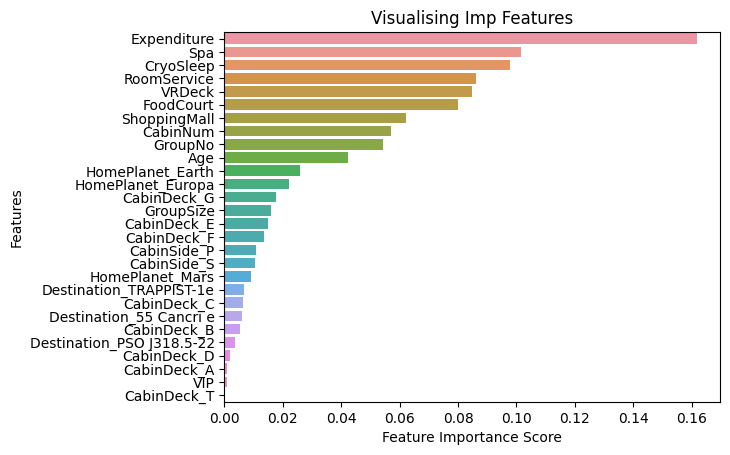

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=impFeature, y=impFeature.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualising Imp Features')
plt.show()

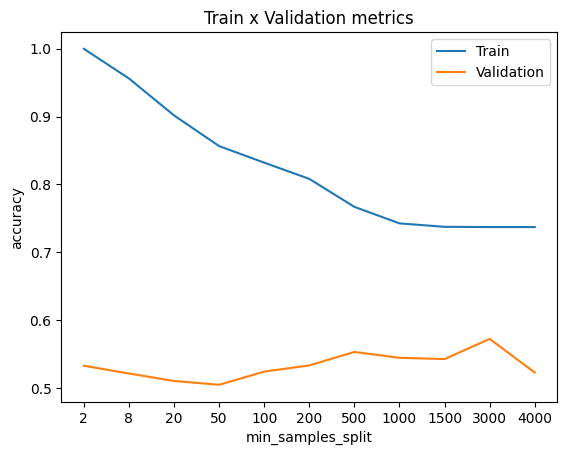

In [ ]:
min_samples_split_list = [2, 8, 20, 50, 100, 200, 500, 1000, 1500, 3000, 4000]
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
                  # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split).fit(X_train,y_train)
    predictions_train = model.predict(X_train)                                  ## The predicted values for the train dataset
    predictions_val = model.predict(X_test)                                     ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
max_depth_list = [1, 2, 4, 8, 16, 32, 64, 128, 256 ,512 ,1024, None]
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

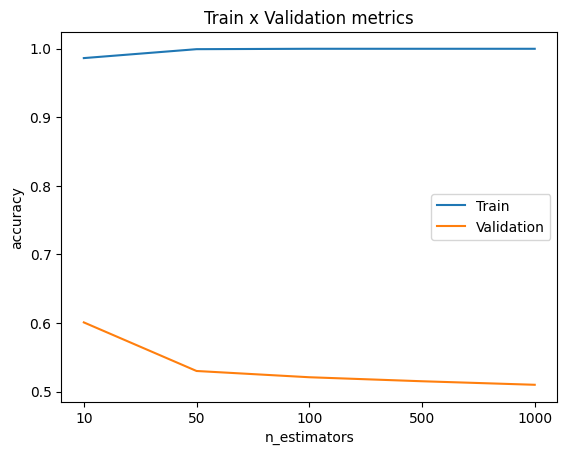

In [ ]:
n_estimators_list = [10,50,100,500,1000]
accuracy_list_train = []
accuracy_list_test = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

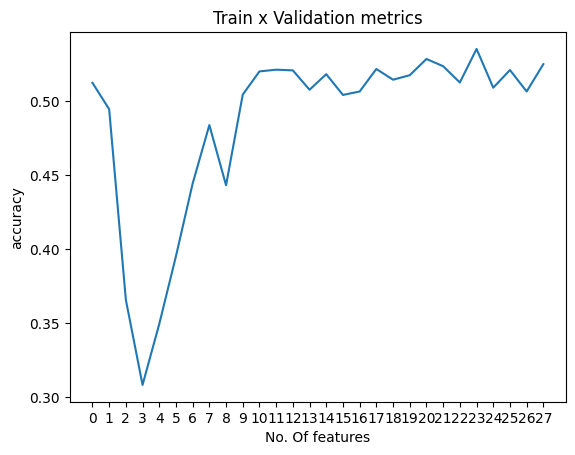

In [ ]:
features = []
scoress = []
for i in impFeature.index:
  features.append(i)
  X_train, X_test, y_train, y_test = (train[features].values, test[features].values,
                                      train['Transported'].values, test["Transported"].values)
  rf.fit(X_train, y_train)
  scoress.append(accuracy_score(y_test, rf.predict(X_test)))

plt.title('Train x Validation metrics')
plt.xlabel('No. Of features')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(scoress)))
plt.plot(scoress)
plt.show()

In [ ]:
newfeatures = pd.DataFrame({ "Feature No." : np.arange(len(scoress)), 'Score' : scoress })
newfeatures.sort_values(by = 'Score', ascending = False)

,Feature No.,Score
23,23,0.535188
20,20,0.528408
27,27,0.524901
21,21,0.523498
17,17,0.521627
11,11,0.521160
25,25,0.520926
12,12,0.520692
10,10,0.519991
14,14,0.518120


In [ ]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = (train.drop(['Transported'], axis=1).values, test.drop(['Transported'], axis=1).values,
                                      train["Transported"].values, test["Transported"].values)
random_forest_model = RandomForestClassifier(n_estimators = 100,max_depth = 32,min_samples_split = 50).fit(X_train,y_train)
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Metrics test:
	Accuracy score: 0.5244


## Modelling

In [ ]:
from sklearn.feature_selection import f_classif
X = train.drop(['Transported'], axis=1)
y = train["Transported"]
f_stats, p_val = f_classif(X,y)
data = pd.DataFrame(data=p_val, columns=['p_val'], index=train.drop(['Transported'], axis=1).columns).sort_values(by='p_val',ascending=False).T
data

,Destination_PSO J318.5-22,CabinDeck_A,CabinDeck_T,CabinDeck_G,HomePlanet_Mars,GroupNo,CabinDeck_D,VIP,CabinNum,Age,...,CabinDeck_E,CabinSide_S,CabinSide_P,CabinDeck_C,Destination_55 Cancri e,CabinDeck_B,HomePlanet_Earth,HomePlanet_Europa,Expenditure,CryoSleep
p_val,0.99,0.81,0.17,0.14,0.07,0.05,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
data.columns

Index(['Destination_PSO J318.5-22', 'CabinDeck_A', 'CabinDeck_T',
       'CabinDeck_G', 'HomePlanet_Mars', 'GroupNo', 'CabinDeck_D', 'VIP',
       'CabinNum', 'Age', 'GroupSize', 'CabinDeck_F',
       'Destination_TRAPPIST-1e', 'CabinDeck_E', 'CabinSide_S', 'CabinSide_P',
       'CabinDeck_C', 'Destination_55 Cancri e', 'CabinDeck_B',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'Expenditure', 'CryoSleep'],
      dtype='object')

In [ ]:
cols = ['CabinDeck_D', 'VIP', 'CryoSleep', 'CabinSide_S', 'CabinSide_P',
       'CabinDeck_F', 'CabinDeck_E', 'CabinDeck_C', 'CabinDeck_B',
       'Destination_55 Cancri e', 'Destination_TRAPPIST-1e', 'Age',
       'HomePlanet_Europa', 'HomePlanet_Earth', 'CabinNum', 'GroupSize',
      'Expenditure']
X_train = train[cols]
y_train = train['Transported']
X_test = test[cols]
y_test = test['Transported']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
cl = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = cl.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:52<00:00,  1.80s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.86,0.86,None,0.93,0.06
BaggingClassifier,0.64,0.64,None,0.78,0.66
DecisionTreeClassifier,0.56,0.56,None,0.72,0.29
ExtraTreesClassifier,0.56,0.56,None,0.72,2.00
LinearDiscriminantAnalysis,0.55,0.55,None,0.71,0.12
RidgeClassifierCV,0.55,0.55,None,0.71,0.06
RidgeClassifier,0.55,0.55,None,0.71,0.04
NearestCentroid,0.55,0.55,None,0.71,0.03
BernoulliNB,0.54,0.54,None,0.70,0.05


In [ ]:
from sklearn.metrics import r2_score,accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
accuracy_score(y_pred, y_test)

0.834229600187047